# Data Science Course

In [15]:
## Importing Libraries
import pandas as pd  # data reading
import seaborn as sns # visualisation
import numpy as np #number Library for computation
import os,re,sys # operation,regular expression, system
import matplotlib.pyplot as plt # visualisation

%matplotlib inline

 <a id="21"></a> <br>
## Machine Learning Workflow


1. Define Problem
1. Specify Inputs & Outputs
1. Exploratory Data Analysis
1. Data Collection
1. Data Preprocessing
1. Data Cleaning
1. Visualization
1. Model Design, Training, and Offline Evaluation
1. Model Deployment, Online Evaluation, and Monitoring
1. Model Maintenance, Diagnosis, and Retraining


 <img src="http://s8.picofile.com/file/8344100018/workflow3.png" />



 <a id="22"></a> <br>
## Real World Application Vs Competitions

<img src="http://s9.picofile.com/file/8339956300/reallife.png" height="600" width="500" />



## Reading the data 
### use pandas pd.read_csv

In [2]:
import pandas as pd
loantraindata=pd.read_csv('D:/Imarticus/ML-Repeat/ML_030ct2020/train_loandata.csv')

## Viewing few top rows ( instead of 'head','tail' could be used to see bottom rows)

In [3]:
loantraindata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## checking data shape

In [4]:
loantraindata.shape

(614, 13)

## checking distribution of DV

In [5]:
loantraindata['Loan_Status'].value_counts()/len(loantraindata)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

## check missing values

In [6]:
loantraindata.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### checking missing value percentage

In [8]:
import numpy as np
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = round((df.isnull().sum())/(df.isnull().count()),3)*100
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)
    
check_missing_data(loantraindata)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Total,0,13,3,15,0,32,0,0,22,14,50,0,0
Percent,0,2.1,0.5,2.4,0,5.2,0,0,3.6,2.3,8.1,0,0
Types,object,object,object,object,object,object,int64,float64,float64,float64,float64,object,object


## taking only non null values
### we would discuss treatment of missing values later

In [9]:
loantraindata_notnull = loantraindata.dropna()

### Checking shape of new data set

In [10]:
loantraindata_notnull.shape

(480, 13)

## checking column type (using dtypes)

In [11]:
loantraindata_notnull.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## changing column type of Credit_History to categorical ( object)

In [12]:
loantraindata_notnull['Credit_History'] = loantraindata_notnull['Credit_History'].astype('object')

C:\Users\Adhvaidh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Another way to see data frame columns types

In [13]:
loantraindata_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              480 non-null object
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null object
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 52.5+ KB


## Viewing few rows

In [16]:
loantraindata_notnull.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1,Urban,Y


## Exploratory Data Analysis

*   1 Data Collection
*   2 Visualization
*   3 Data Preprocessing
*   4 Data Cleaning
<img src="http://s9.picofile.com/file/8338476134/EDA.png">



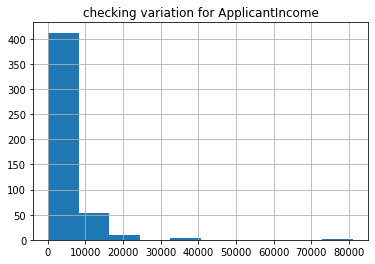

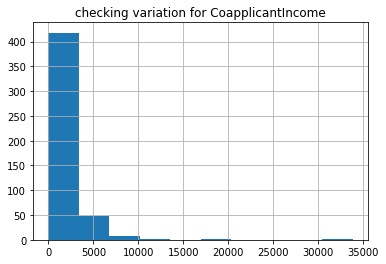

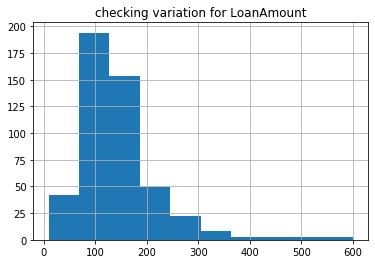

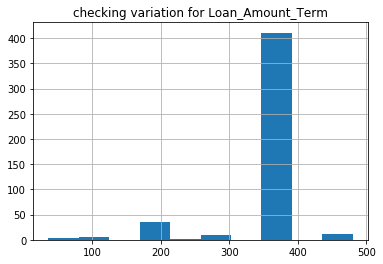

In [16]:
for g in loantraindata_notnull.select_dtypes(include=['float64','int64']).columns:
    fig, axes = plt.subplots(nrows=1,ncols=1)
    #print("checking variation for {}".format(c))
    
    f1=loantraindata_notnull[g].hist(ax=axes)
    f1.title.set_text("checking variation for {}".format(g))


## taking statistics for numerical columbs with respect to Loan Status

In [17]:
loantraindata_notnull[['Loan_Status','LoanAmount']].groupby(['Loan_Status']).agg([np.mean,np.median])

LoanAmount       
                   mean median
Loan_Status                   
N            153.378378  128.0
Y            140.882530  128.0

In [18]:
loantraindata_notnull[['Loan_Status','ApplicantIncome']].groupby(['Loan_Status']).agg([np.mean,np.median])

ApplicantIncome        
                       mean  median
Loan_Status                        
N               5730.189189  3871.0
Y               5201.093373  3858.5

In [19]:
loantraindata_notnull[['Loan_Status','CoapplicantIncome']].groupby(['Loan_Status']).agg([np.mean,np.median])

CoapplicantIncome        
                         mean  median
Loan_Status                          
N                 1773.081081     0.0
Y                 1495.508795  1211.5

In [20]:
loantraindata_notnull[['Loan_Status','Loan_Amount_Term']].groupby(['Loan_Status']).agg([np.mean,np.median])

Loan_Amount_Term       
                        mean median
Loan_Status                        
N                 342.810811  360.0
Y                 341.710843  360.0

## Visualising categorical columns with respect to Loan Status

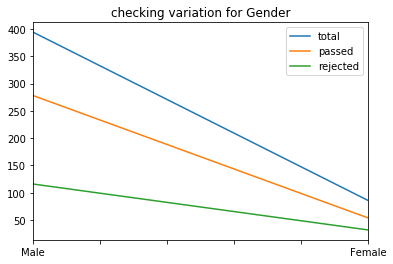

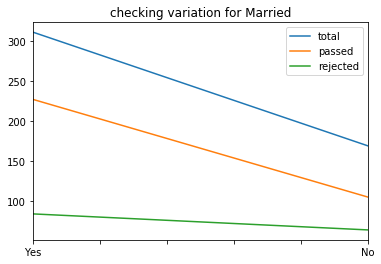

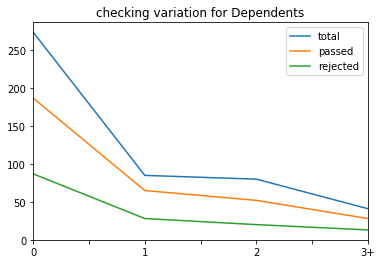

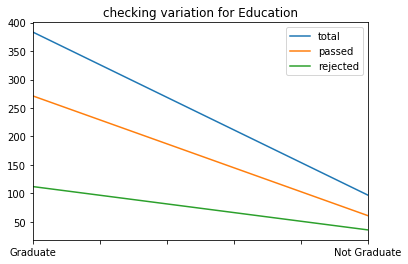

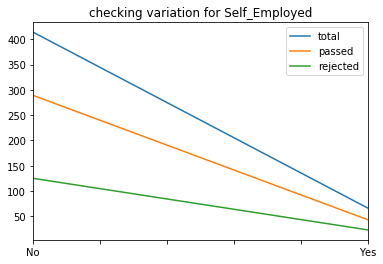

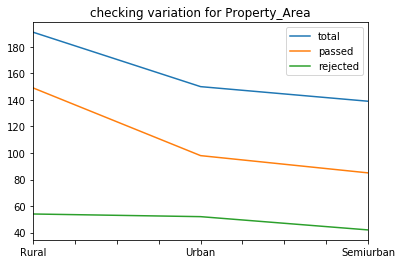

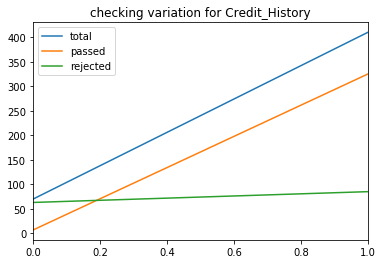

In [22]:
for c in ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History']:
    
   
    
    passed=loantraindata_notnull[loantraindata_notnull['Loan_Status'] == 'Y'][c].value_counts()
    rejected=loantraindata_notnull[loantraindata_notnull['Loan_Status'] == 'N'][c].value_counts()
    total=loantraindata_notnull[c].value_counts()

    fig, axes = plt.subplots(nrows=1,ncols=1)
    #print("checking variation for {}".format(c))
    
    f1= total.plot(ax=axes,label='total')
    f1.title.set_text("checking variation for {}".format(c))
    
    f2=passed.plot(ax=axes,label='passed')
    #f2.title.set_text("checking variation for {}".format(c))
    
    f3=rejected.plot(ax=axes,label='rejected')
    #f3.title.set_text("checking variation for {}".format(c))

    axes.legend(loc='best')



In [23]:
loantraindata_notnull[loantraindata_notnull['Loan_Status'] == 'Y']['Credit_History'].value_counts()/len(loantraindata_notnull[loantraindata_notnull['Loan_Status'] == 'Y'])

1.0    0.978916
0.0    0.021084
Name: Credit_History, dtype: float64

In [24]:
loantraindata_notnull[loantraindata_notnull['Loan_Status'] == 'N']['Credit_History'].value_counts()/len(loantraindata_notnull[loantraindata_notnull['Loan_Status'] == 'N'])

1.0    0.574324
0.0    0.425676
Name: Credit_History, dtype: float64

## Distribution of numeric data ( segregated by Loan status)

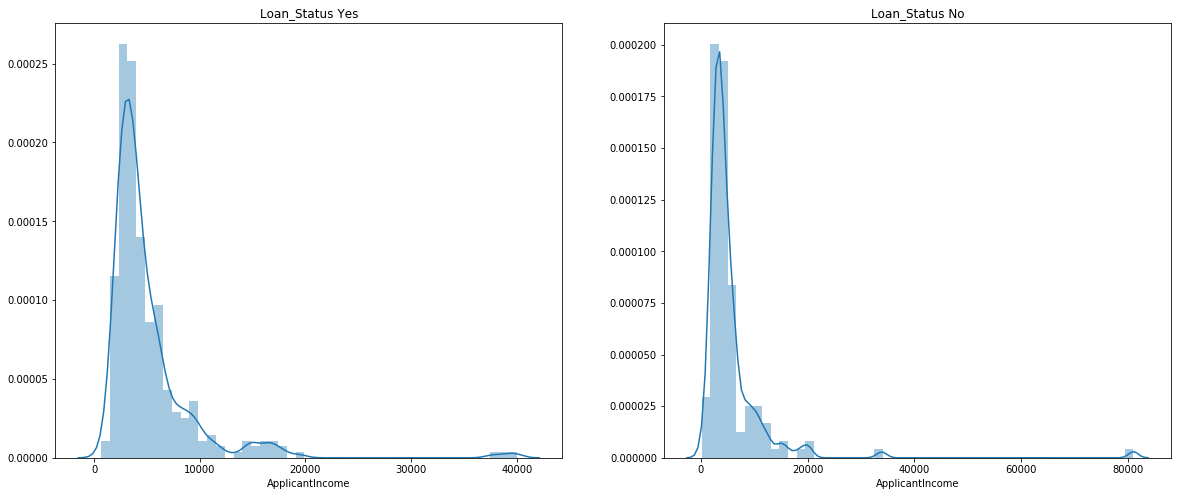

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='Y'].ApplicantIncome,ax=ax[0])
ax[0].set_title('Loan_Status Yes')
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='N'].ApplicantIncome,ax=ax[1])
ax[1].set_title('Loan_Status No')

plt.show()

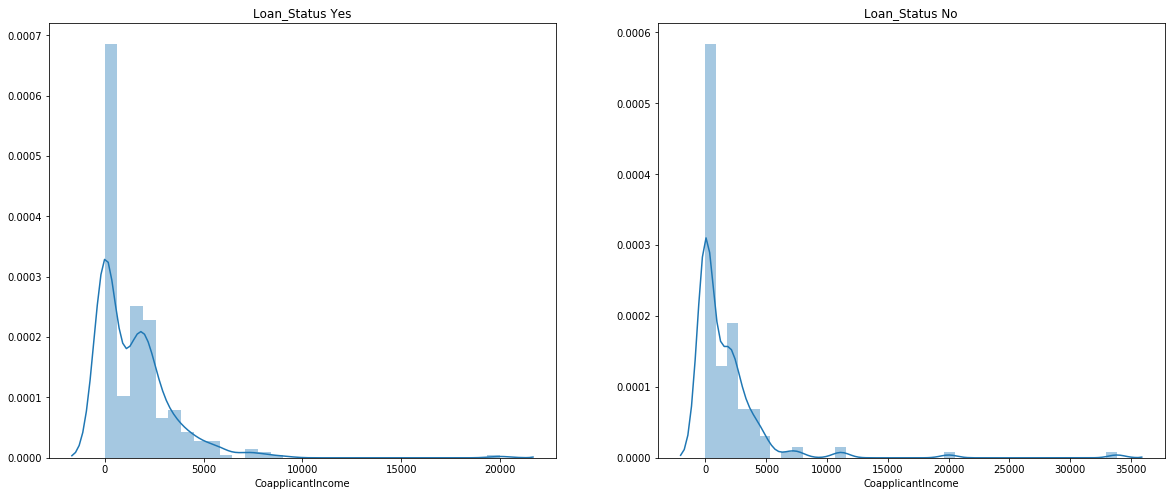

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='Y'].CoapplicantIncome,ax=ax[0])
ax[0].set_title('Loan_Status Yes')
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='N'].CoapplicantIncome,ax=ax[1])
ax[1].set_title('Loan_Status No')

plt.show()

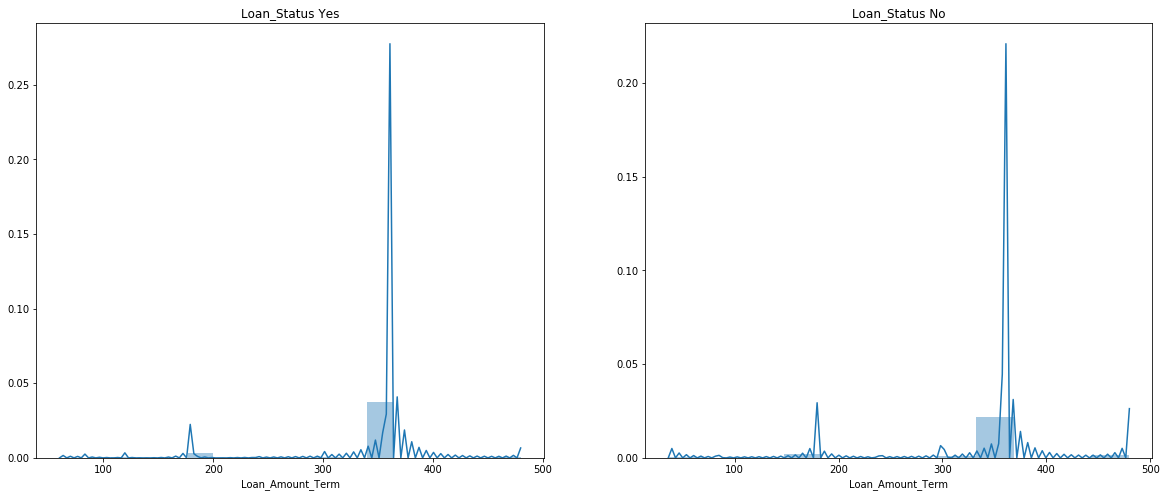

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='Y'].Loan_Amount_Term,ax=ax[0])
ax[0].set_title('Loan_Status Yes')
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='N'].Loan_Amount_Term,ax=ax[1])
ax[1].set_title('Loan_Status No')

plt.show()

## Effect of Log transformation

In [31]:
loantraindata_notnull['log_LoanAmount']=loantraindata_notnull['LoanAmount'].apply(lambda x : np.log(x))

C:\Users\OMR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


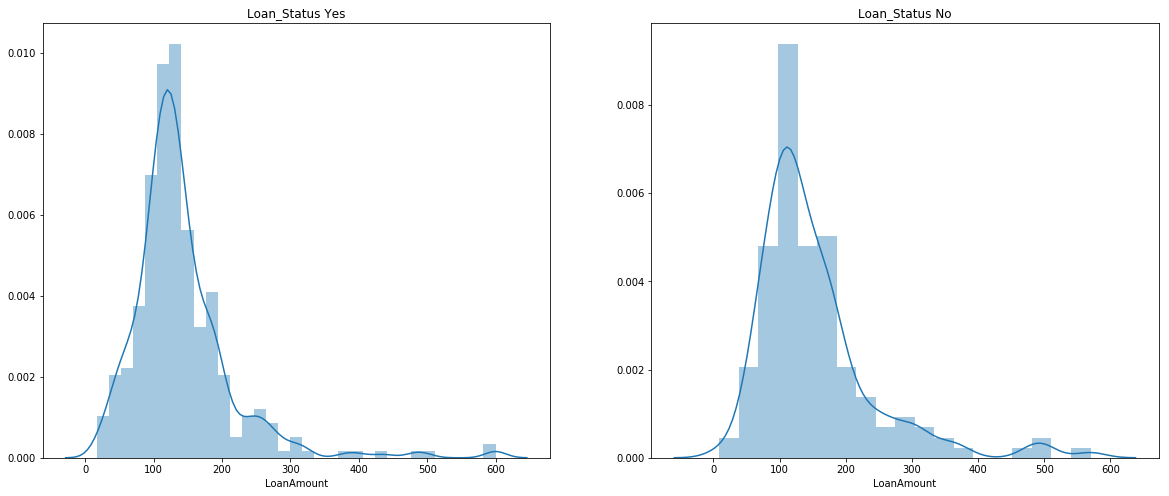

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='Y'].LoanAmount,ax=ax[0])
ax[0].set_title('Loan_Status Yes')
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='N'].LoanAmount,ax=ax[1])
ax[1].set_title('Loan_Status No')

plt.show()

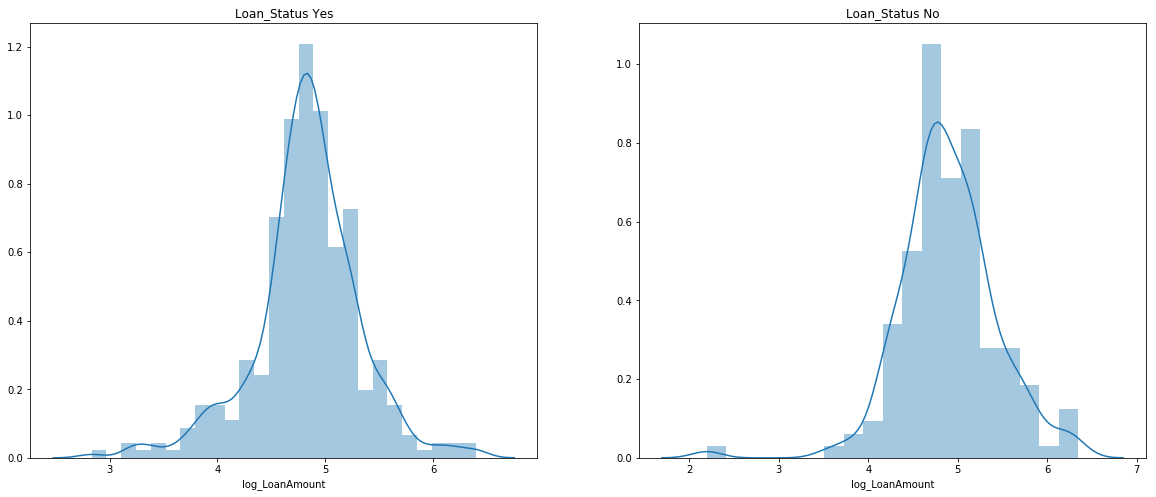

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='Y'].log_LoanAmount,ax=ax[0])
ax[0].set_title('Loan_Status Yes')
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='N'].log_LoanAmount,ax=ax[1])
ax[1].set_title('Loan_Status No')

plt.show()

## Pairplots to analyse variation of numeric columns and distribution with DV

C:\Users\OMR\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


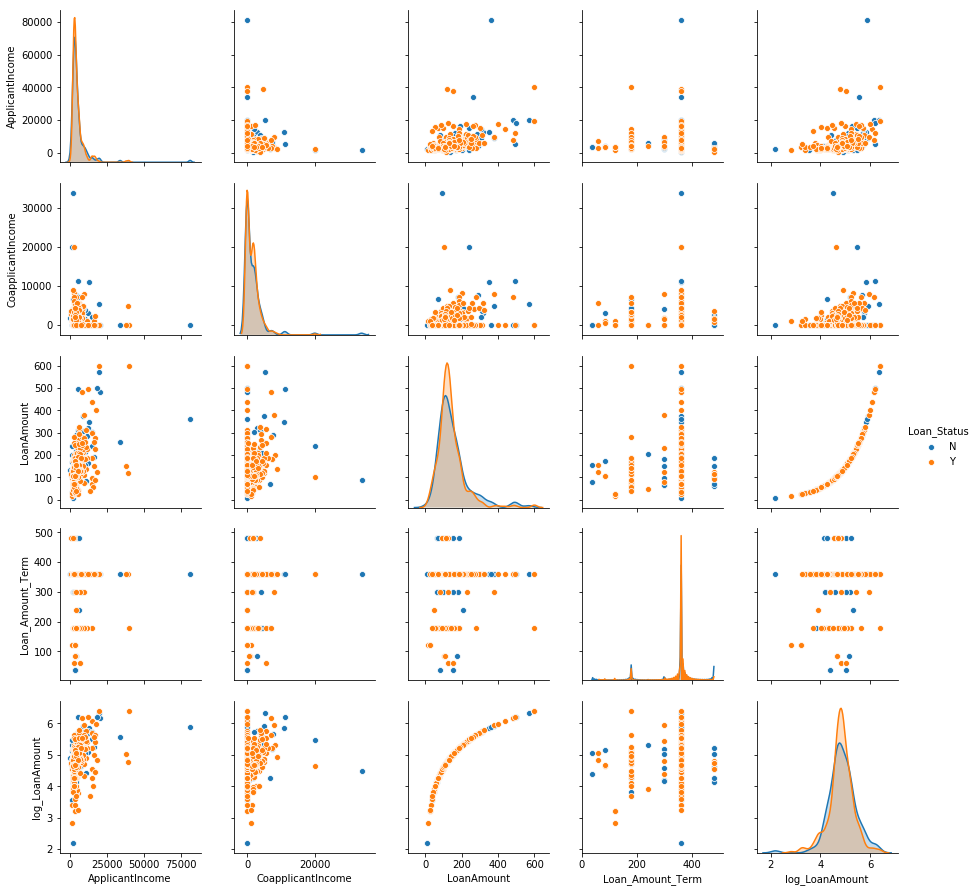

In [34]:
neededcols=list(loantraindata_notnull.select_dtypes(include=['float64','int64']).columns) + ['Loan_Status']
sns.pairplot(loantraindata_notnull[neededcols],hue='Loan_Status',size=2.5)

## Once EDA is done, we can try more ways to normalize/feature enginner the data and then comes the Modeling stage

## What is Machine Learning and ML Algorithm(s)

<img src="https://thinkmedia.com.ng/wp-content/uploads/2019/05/0.png" height="700" width="1000" />

## Mind Map of different ML algos

<img src="https://i0.wp.com/techutils.in/wp-content/uploads/2015/12/MachineLearningAlgorithms-1.png" height="700" width="1000" />

## How to we select an Algorithm
### Key points to understand here are 
* 1 What is a selection criteria
* 2 Performance Measures : Differrent methods to measure performance of Algos
* 3 Overfitting & Underfitting (Bias-Variance Trade-Off)


## overfitting &  underfitting

<img src='https://cdn-images-1.medium.com/max/800/1*JZbxrdzabrT33Yl-LrmShw.png' width=500 height=500>
1. graph on the left side:
    1. we can predict that the line does not cover all the points shown in the graph. Such model tend to cause underfitting of data .It also called High Bias.

1. graph on right side:
    1. shows the predicted line covers all the points in graph. In such condition you can also think that it’s a good graph which cover all the points. But that’s not actually true, the predicted line into the graph covers all points which are noise and outlier. Such model are also responsible to predict poor result due to its complexity.It is also called High Variance.

1. middle graph:
    1. it shows a pretty good predicted line. It covers majority of the point in graph and also maintains the balance between bias and variance.[30]

## Bootstrap sampling

In [54]:


from sklearn.utils import resample
# data sample
data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=4, random_state=1)
print('Bootstrap Sample: %s' % boot)
# out of bag observations
oob = [x for x in data if x not in boot]
print('OOB Sample: %s' % oob)

Bootstrap Sample: [0.6, 0.4, 0.5, 0.1]
OOB Sample: [0.2, 0.3]


## Example of confidence Interval creation on our data

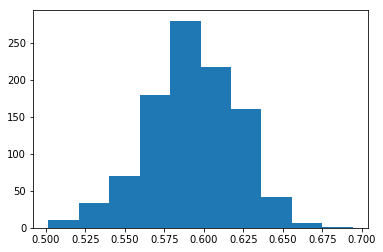

95.0 confidence interval 53.4% and 64.4%


In [36]:
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# load dataset
neededcols=list(loantraindata_notnull.select_dtypes(include=['float64','int64']).columns) + ['Loan_Status']

data = loantraindata_notnull[neededcols]
values = data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    # fit model
    model = DecisionTreeClassifier()
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    #print(score)
    stats.append(score)
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## Difference and working of different ML algos

### Parametric & Non-parametric ML Algorithm


### Linear Models 
### Support Vector Machine
### Decision Tree models
### Baging Aggregation and boosting

### Types of optimization Algorithms

### Constant Learning Rate Procedures
#### Gradient Descent

* Stochastic Gradient Descent
* Batch Gradient Descent 

    for i in range(nb_epochs):
        params_grad = evaluate_gradient(loss_function, data, params)
        params = params - learning_rate * params_grad
* Mini Batch Gradient Descent

#####  Adaptive Learning Procedures
##### Nesterov Accelerated Gradient
##### Root Mean Squared Propagation
##### Adaptive Moment Estimation Procedure 



##### batch GD
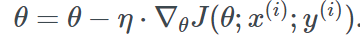

##### Momentum
\begin{align} 
\begin{split} 
v_t &= \gamma v_{t-1} + \eta \nabla_\theta J( \theta) \\ 
\theta &= \theta - v_t 
\end{split} 
\end{align}

In [37]:
## Mean Square Error , Mean Absolute Error, log liklihood, Accuracy, Confusion Table, Recall, Precision, F1 Score

<img src='http://cs231n.github.io/assets/nn3/opt1.gif' width=500 height=500>
<img src='http://cs231n.github.io/assets/nn3/opt2.gif' width=500 height=500>


Vanilla mini-batch gradient descent, however, does not guarantee good convergence, but offers a few challenges that need to be addressed:

* Choosing a proper learning rate can be difficult. A learning rate that is too small leads to painfully slow convergence, while a learning rate that is too large can hinder convergence and cause the loss function to fluctuate around the minimum or even to diverge.

* Learning rate schedules. try to adjust the learning rate during training by e.g. annealing, i.e. reducing the learning rate according to a pre-defined schedule or when the change in objective between epochs falls below a threshold. These schedules and thresholds, however, have to be defined in advance and are thus unable to adapt to a dataset's characteristics.

* Additionally, the same learning rate applies to all parameter updates. If our data is sparse and our features have very different frequencies, we might not want to update all of them to the same extent, but perform a larger update for rarely occurring features.

* Another key challenge of minimizing highly non-convex error functions common for neural networks is avoiding getting trapped in their numerous suboptimal local minima. Dauphin et al. argue that the difficulty arises in fact not from local minima but from saddle points, i.e. points where one dimension slopes up and another slopes down. These saddle points are usually surrounded by a plateau of the same error, which makes it notoriously hard for SGD to escape, as the gradient is close to zero in all dimensions.

##### NAG
\begin{align} 
\begin{split} 
v_t &= \gamma v_{t-1} + \eta \nabla_\theta J( \theta - \gamma v_{t-1} ) \\ 
\theta &= \theta - v_t 
\end{split} 
\end{align}

#### RMS Prop
\begin{align} 
\begin{split} 
E[g^2]_t &= 0.9 E[g^2]_{t-1} + 0.1 g^2_t \\ 
\theta_{t+1} &= \theta_{t} - \dfrac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_{t} 
\end{split} 
\end{align}


RMSprop as well divides the learning rate by an exponentially decaying average of squared gradients. Hinton suggests 
γ to be set to 0.9, while a good default value for the learning rate η is 0.001.

In [40]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show code."></form>''')